In [71]:
# Read the dictionary.txt file. The openAI completion API accepts a maximum of 4097 tokens.
import tiktoken

with open("dictionary.txt", "r") as file:
  text = file.read()
  tokenizer = tiktoken.encoding_for_model("text-davinci-003")
  encoded = tokenizer.encode(text[85855:85855+9000])
  print(len(encoded))

3814


In [72]:
# Extract the frist 3814 tokens of the ESPAÑOL-WAYUUNAIKI dictionary.
shorthened_text = text[85855:85855+9000]

In [73]:
print(shorthened_text)

ESPAÑOL-WAYUUNAIKI
NOTAS SOBRE LA GRAMÁTICA
El nombre
En el español cada nombre es de género masculino o femenino. Los que refieren
a varones o animales machos son masculinos. Los que refieren a mujeres yanimales hembras son femeninos. En cuanto a los demás nombres, muchas veceslos que terminan en ason femeninos y los que terminan en otra vocal son
masculinos, pero existen excepciones. Por eso, el género de cada nombre se
indica en su respectivo artículo en el diccionario. Muchos nombres masculinosque terminan en -o, por ejemplo los nombres de oficios, tienen sus formas
femeninas correspondientes que terminan en -a. Para estos, se da primero en el
diccionario la forma masculina seguida por la parte final y distinta de la formafemenina.
El plural de un nombre se forma con un sufijo. Por lo general, a un nombre que
termina en una vocal, se le añade -s. Al que termina en consonante, se le añade
-es.
El artículoEl artículo va delante de un nombre para anunciar su género y número. Losartícu

In [10]:
# Add the OpenAI API key.
import openai
openai.api_key = "..."

In [74]:
# Create a function to translate a text from Spanish to Wayuunaiki.
def translate(
    model="text-davinci-003",
    question="Tigre",
    debug=False,
    max_tokens=150,
    stop_sequence=None
):
    context = "Traduce de Español a Wayuunaiki el Texto dado, teniendo en cuenta el siguiente diccionario como contexto:\n\n"+shorthened_text+"\n\n"

    try:
        # Create a completions using the question and context
        response = openai.Completion.create(
            prompt=f"Contexto: {context}\n\n---\n\nTexto: {question}\nTraducción:",
            temperature=0,
            max_tokens=max_tokens,
            top_p=1,
            frequency_penalty=0,
            presence_penalty=0,
            stop=stop_sequence,
            model=model,
        )
        return response["choices"][0]["text"].strip()
    except Exception as e:
        print(e)
        return ""

In [75]:
translate(question="amigo")

'Atünajutü'

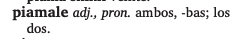
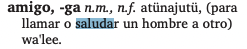

In [76]:
translate(question="ambos saludan a un amigo")

"Piamale wa'le atünajutü."